In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None


In [2]:

# Read the dataset
df = pd.read_csv("../Data_Lab/cardio_train.csv", sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## EDA

### Number of cases with cardiovascular dissease (Positive / Negative)

In [4]:
# Number of positive and negative cases

positive_cases = df[df['cardio'] == 1].shape[0]
negative_cases = df[df['cardio'] == 0].shape[0] 
# shape[0] to count the number of rows

print(f"Positive cases: {positive_cases}")
print(f"Negative cases: {negative_cases}")

Positive cases: 34979
Negative cases: 35021


### Cholesterol Levels

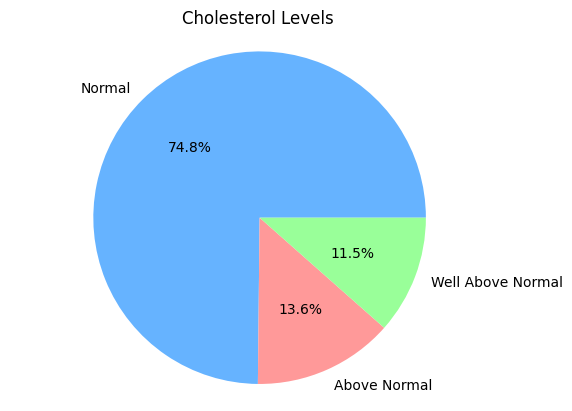

In [5]:
# Percentage of each cholesterol level
cholesterol_counts = df['cholesterol'].value_counts(normalize=True) * 100

# Pie chart
labels = ['Normal', 'Above Normal', 'Well Above Normal']
colors = ['#66b3ff', '#ff9999', '#99ff99']
plt.pie(cholesterol_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Cholesterol Levels')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Display the chart
plt.show()

### Age Distribution

- I will convert from days to years.

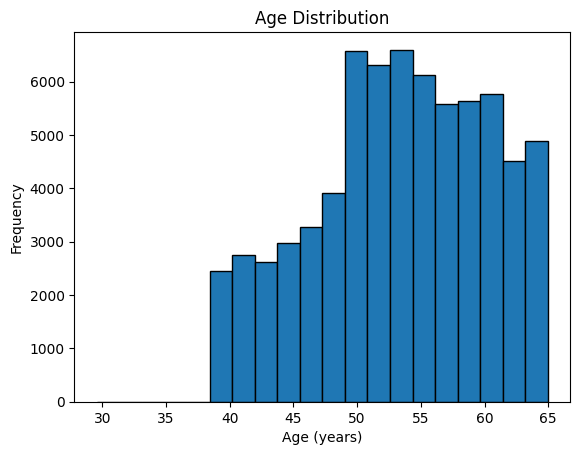

In [6]:
# Converts age from days to years
df['age_years'] = df['age'] / 365

# Histogram
plt.hist(df['age_years'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')

# Display the chart
plt.show()

### Percentage of smokers

In [7]:
# Calculate the percentage of smokers
smoker_counts = df['smoke'].value_counts(normalize=True) * 100
percentage_smokers = smoker_counts[1]

print(f"Percentage of smokers: {percentage_smokers:.2f}%")

Percentage of smokers: 8.81%


### Weight and Height Distribution

- Here we notice some outliers.

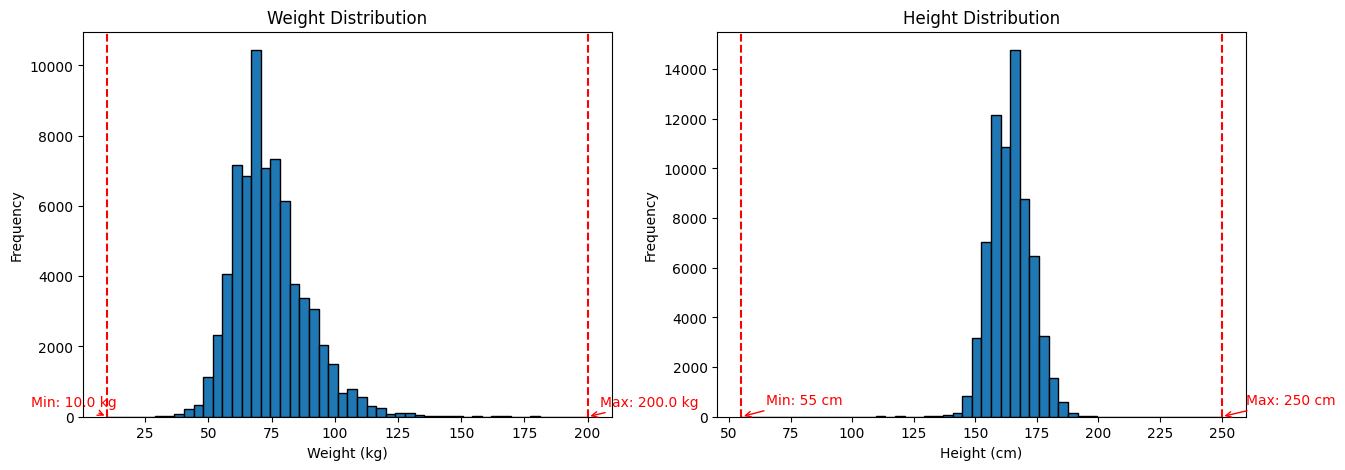

In [8]:
# Subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


# -----------------------------------------
# Weight distribution Plot
ax1.hist(df['weight'], bins=50, edgecolor='black')
ax1.set_title('Weight Distribution')
ax1.set_xlabel('Weight (kg)')
ax1.set_ylabel('Frequency')

# Vertical lines and annotations for weight min and max
weight_min = df['weight'].min()
weight_max = df['weight'].max()
ax1.axvline(weight_min, color='red', linestyle='--')
ax1.axvline(weight_max, color='red', linestyle='--')
ax1.annotate(f'Min: {weight_min} kg', xy=(weight_min, 0), xytext=(weight_min-30, 300), color='red', arrowprops=dict(arrowstyle='->', color='red'))
ax1.annotate(f'Max: {weight_max} kg', xy=(weight_max, 0), xytext=(weight_max+5, 300), color='red', arrowprops=dict(arrowstyle='->', color='red'))



# -----------------------------------------
# Height distribution Plot
ax2.hist(df['height'], bins=50, edgecolor='black')
ax2.set_title('Height Distribution')
ax2.set_xlabel('Height (cm)')
ax2.set_ylabel('Frequency')


# Vertical lines and annotations for height min and max
height_min = df['height'].min()
height_max = df['height'].max()
ax2.axvline(height_min, color='red', linestyle='--')
ax2.axvline(height_max, color='red', linestyle='--')
ax2.annotate(f'Min: {height_min} cm', xy=(height_min, 0), xytext=(height_min+10, 500), color='red', arrowprops=dict(arrowstyle='->', color='red'))
ax2.annotate(f'Max: {height_max} cm', xy=(height_max, 0), xytext=(height_max+10, 500), color='red', arrowprops=dict(arrowstyle='->', color='red'))


plt.show()

## Feature Engineering BMI
- A feature for Body Mass Index
- Remove outliers
- Create categorical BMI-feature with: normal range, overweight, obese (class 1), obese (class 2) and obese (class 3)

I will create a new column for body mass index called BMI and vizualize the outliers

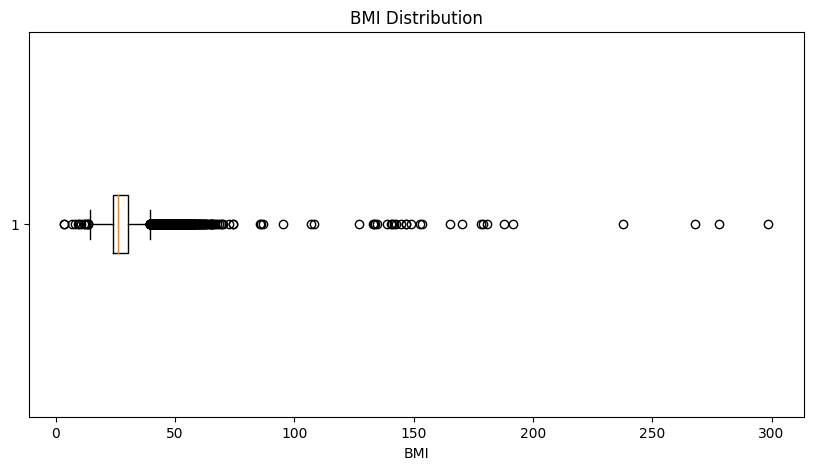

In [9]:
# Calculate BMI
df['BMI'] = df['weight'] / (df['height'] / 100)**2

# Create a box plot
plt.figure(figsize=(10, 5))
plt.boxplot(df['BMI'], vert=False)
plt.title('BMI Distribution')
plt.xlabel('BMI')

# Display the chart
plt.show()

In [10]:
# function to calculate outliers using quantiles

def calculate_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    
    return outliers

# Calculate the outliers for systolic BMI 
bmi_outliers = calculate_outliers(df['BMI'])



# Print the number of outliers for each feature
print(f"Number of body mass index (BMI) outliers: {len(bmi_outliers)}")


Number of body mass index (BMI) outliers: 1995


We have some extreme outliers. According to wikipedia, these are the ranges of interest:

- Underweight (Severe thinness)	< 16.0
- Underweight (Moderate thinness)	16.0 – 16.9	
- Underweight (Mild thinness)	17.0 – 18.4	
- Normal range	18.5 – 24.9	
- Overweight (Pre-obese)	25.0 – 29.9	
- Obese (Class I)	30.0 – 34.9	
- Obese (Class II)	35.0 – 39.9	
- Obese (Class III)	≥ 40.0	

In [11]:
# Amount with BMI >= 50
above_50_count = (df['BMI'] >= 50).sum()

# Count the number of rows with BMI < 18.5
below_15_count = (df['BMI'] < 15).sum()

total_bmi = df['BMI'].count()

print(f"Number of rows with BMI < 15: {below_15_count}")
print(f"Number of rows with BMI >= 50: {above_50_count}")
print(f"Total: {total_bmi}")

Number of rows with BMI < 15: 27
Number of rows with BMI >= 50: 244
Total: 70000


In [12]:
total_rows = 70000

# Calculate the percentages
below_15_percentage = (below_15_count / total_rows) * 100
above_50_percentage = (above_50_count / total_rows) * 100

print(f"Percentage of rows with BMI < 15: {below_15_percentage:.2f}%")
print(f"Percentage of rows with BMI >= 50: {above_50_percentage:.2f}%")

Percentage of rows with BMI < 15: 0.04%
Percentage of rows with BMI >= 50: 0.35%


I will discard the rest of the values above 50 and below 18.5

50 Might be extreme but I think its important to include the data on the upper end on this particular subject.

In [13]:
# Filter the dataset based on BMI ranges of interest
filtered_data = df[
    (df['BMI'] >= 15) &
    (df['BMI'] <= 50.0)
]

# Calculate the number of rows removed
removed_rows = len(df) - len(filtered_data)

print(f"Original dataset size: {len(df)}")
print(f"Filtered dataset size: {len(filtered_data)}")
print(f"Removed {removed_rows} rows due to BMI outliers")

Original dataset size: 70000
Filtered dataset size: 69729
Removed 271 rows due to BMI outliers


Double check to see if it is still close to 50% ( Positive / Negative ) disease. 

In [14]:
# Number of positive and negative cases

positive_cases_filtered = filtered_data[filtered_data['cardio'] == 1].shape[0]
negative_cases_filtered = filtered_data[filtered_data['cardio'] == 0].shape[0] 

print(f"Positive cases filtered data: {positive_cases_filtered}")
print(f"Negative cases filtered data: {negative_cases_filtered}")

Positive cases filtered data: 34808
Negative cases filtered data: 34921


### Create categorical features for:
- Normal range
- Overweight
- Obese (class I) 
- Obese (class II)
- Obese (class III)

In [15]:
# Categorical feature  by using pd.cut. Segment and sort data values into bins
# https://pandas.pydata.org/docs/reference/api/pandas.cut.html

# Define the categories and their corresponding BMI ranges
bmi_categories = ['Normal range', 'Overweight (Pre-obese)', 'Obese (Class I)', 'Obese (Class II)', 'Obese (Class III)']
bmi_ranges = [18.5, 24.9, 29.9, 34.9, 39.9, filtered_data['BMI'].max()]

# Categorical BMI feature using pd.cut()
filtered_data['BMI_category'] = pd.cut(filtered_data['BMI'], bins=bmi_ranges, labels=bmi_categories, include_lowest=True)

# Check
filtered_data.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,21.967120,Normal range
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,34.927679,Obese (Class II)
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.507805,Normal range


## Feature Engineering Blood Pressure
- A feature for Blood Pressure
- Remove outliers
- Create categorical Blood Pressure feature with: healthy, elevated, hypertension(I), hypertension(II) and hypertensive crisis.

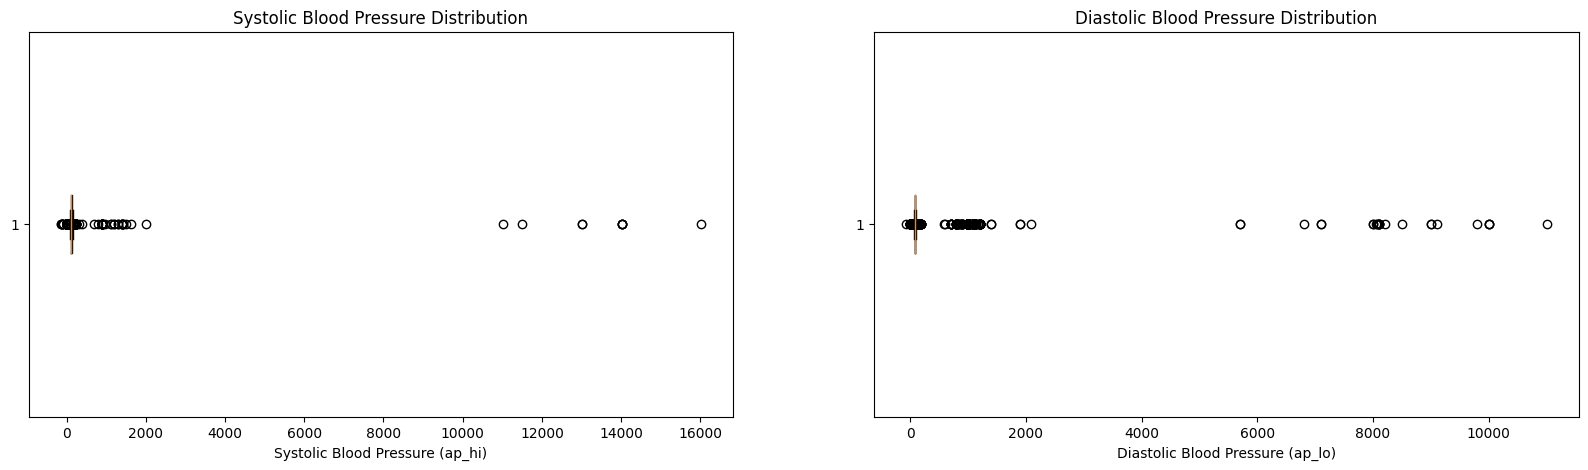

In [16]:

# Create a figure and axis
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Create a box plot for systolic blood pressure (ap_hi)
ax[0].boxplot(filtered_data['ap_hi'], vert=False)
ax[0].set_title('Systolic Blood Pressure Distribution')
ax[0].set_xlabel('Systolic Blood Pressure (ap_hi)')

# Create a box plot for diastolic blood pressure (ap_lo)
ax[1].boxplot(filtered_data['ap_lo'], vert=False)
ax[1].set_title('Diastolic Blood Pressure Distribution')
ax[1].set_xlabel('Diastolic Blood Pressure (ap_lo)')

# Display the charts
plt.show()

Some extreme outliers.

In [17]:
def calculate_outliers_and_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    
    return outliers, lower_bound, upper_bound

# Calculate the outliers and bounds for systolic blood pressure (ap_hi)
systolic_outliers, systolic_lower_bound, systolic_upper_bound = calculate_outliers_and_bounds(filtered_data['ap_hi'])

# Calculate the outliers and bounds for diastolic blood pressure (ap_lo)
diastolic_outliers, diastolic_lower_bound, diastolic_upper_bound = calculate_outliers_and_bounds(filtered_data['ap_lo'])

# Print the number of outliers and the outlier ranges for each feature
print(f"Number of systolic blood pressure (ap_hi) outliers: {len(systolic_outliers)}")
print(f"Systolic blood pressure (ap_hi) outlier range: < {systolic_lower_bound} or > {systolic_upper_bound}")
print(f"Number of diastolic blood pressure (ap_lo) outliers: {len(diastolic_outliers)}")
print(f"Diastolic blood pressure (ap_lo) outlier range: < {diastolic_lower_bound} or > {diastolic_upper_bound}")

Number of systolic blood pressure (ap_hi) outliers: 1417
Systolic blood pressure (ap_hi) outlier range: < 90.0 or > 170.0
Number of diastolic blood pressure (ap_lo) outliers: 4603
Diastolic blood pressure (ap_lo) outlier range: < 65.0 or > 105.0


Using quantiles removes to much data, also it removes to much valuable data. Like with BMI, I will set a specific range

In [18]:
# Count the number of rows with systolic blood pressure above 180
systolic_above_180 = len(filtered_data[filtered_data['ap_hi']  > 180])

# Count the number of rows with diastolic blood pressure over 120
diastolic_above_120 = len(filtered_data[filtered_data['ap_lo'] > 120])

# Print the counts
print(f"Number of rows with systolic blood pressure above 180: {systolic_above_180}")
print(f"Number of rows with diastolic blood pressure over 120: {diastolic_above_120}")


Number of rows with systolic blood pressure above 180: 362
Number of rows with diastolic blood pressure over 120: 1046


That is a lot more acceptable. I will increase the systolic to 250 and diastolic to 150 for good measure to acount for all categories.

In [19]:
# Filter the dataset to keep only rows with systolic blood pressure between 0 and 250
filtered_systolic = (filtered_data['ap_hi'] >= 0) & (filtered_data['ap_hi'] <= 250)

# Filter the dataset to keep only rows with diastolic blood pressure between 0 and 150
filtered_diastolic = (filtered_data['ap_lo'] >= 0) & (filtered_data['ap_lo'] <= 150)

# Create a new dataset with the desired blood pressure ranges
filtered_bp_data = filtered_data[filtered_systolic & filtered_diastolic]

# Display the sizes of the filtered_data and filtered_bp_data datasets
print(f"Filtered data size (before blood pressure filtering): {len(filtered_data)}")
print(f"Filtered data size (after blood pressure filtering): {len(filtered_bp_data)}")


Filtered data size (before blood pressure filtering): 69729
Filtered data size (after blood pressure filtering): 68714


In [20]:


def blood_pressure_category(row):
    systolic = row['ap_hi']
    diastolic = row['ap_lo']

    if systolic < 120 and diastolic < 80:
        return 'Healthy'
    elif 120 <= systolic <= 129 and diastolic < 80:
        return 'Elevated'
    elif 130 <= systolic <= 139 or 80 <= diastolic <= 89:
        return 'Stage 1 hypertension'
    elif systolic < 180 or diastolic < 120:
        return 'Stage 2 hypertension'
    else:
        return 'Hypertension crisis'

# Apply the blood_pressure_category function to each row in the filtered dataset
filtered_bp_data['bp_category'] = filtered_bp_data.apply(blood_pressure_category, axis=1)

new_df = filtered_bp_data.copy()

# Display the first few rows of the dataset with the new 'bp_category' feature
new_df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_category,bp_category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,21.967120,Normal range,Stage 1 hypertension
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,34.927679,Obese (Class II),Stage 2 hypertension
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.507805,Normal range,Stage 1 hypertension
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,28.710479,Overweight (Pre-obese),Stage 2 hypertension
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,23.011177,Normal range,Healthy


In [21]:
new_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
count,68714.000000,68714.000000,68714.000000,68714.000000,68714.000000,68714.000000,68714.000000,68714.000000,68714.000000,68714.000000,68714.000000,68714.000000,68714.000000,68714.000000,68714.000000
mean,49969.522761,19462.890634,1.349172,164.445994,73.972653,126.297188,81.291323,1.363652,1.224889,0.088032,0.053541,0.803301,0.494266,53.322988,27.384576
std,28845.224135,2468.261049,0.476712,7.852654,13.925914,17.655331,9.728493,0.678159,0.570752,0.283343,0.225111,0.397506,0.499971,6.762359,5.038535
min,0.000000,10798.000000,1.000000,98.000000,28.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.583562,15.012197
25%,25003.750000,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.372603,23.875115
50%,50014.500000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.972603,26.298488
75%,74859.750000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.419178,30.110991
max,99999.000000,23713.000000,2.000000,207.000000,180.000000,240.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.967123,50.000000


## Visualizations

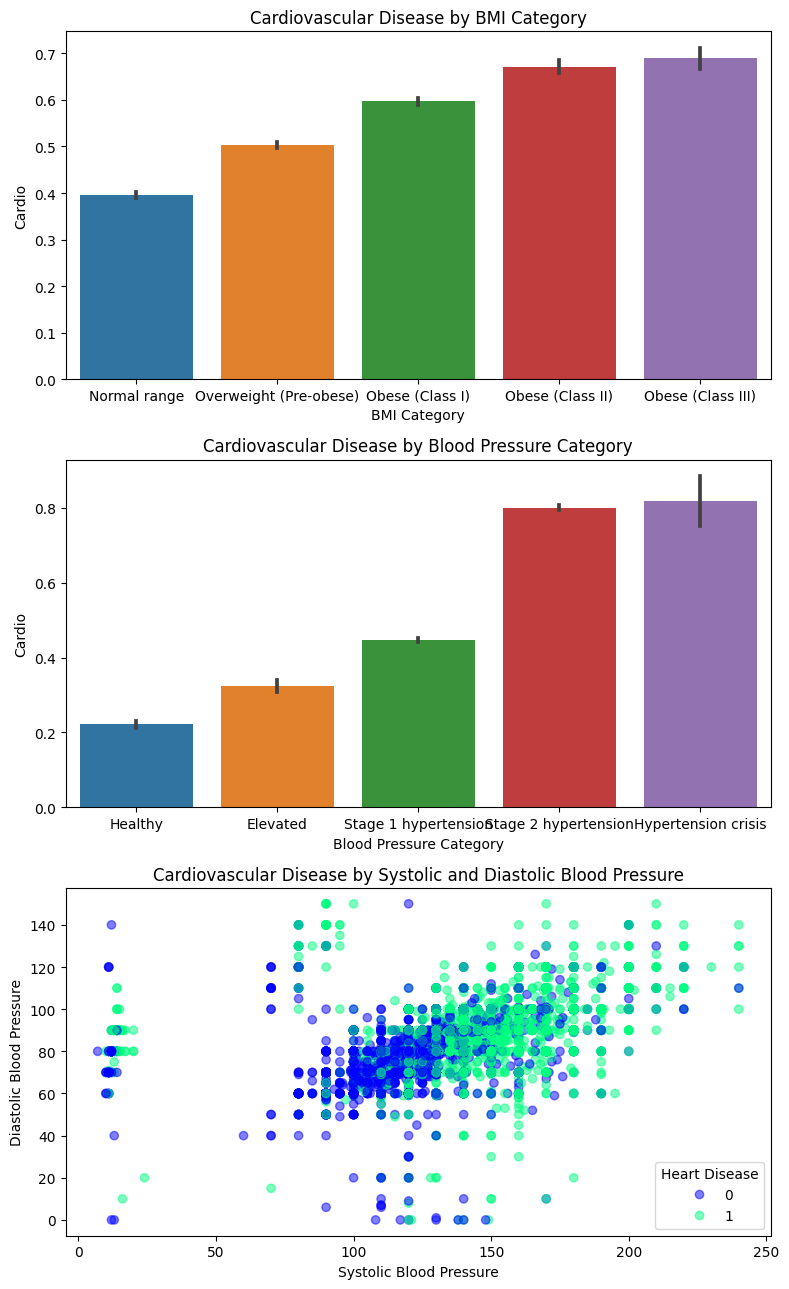

In [22]:

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 13))

# Barplot for BMI_category vs cardio
sns.barplot(ax=axes[0], x='BMI_category', y='cardio', data=new_df)
axes[0].set(title='Cardiovascular Disease by BMI Category', xlabel='BMI Category', ylabel='Cardio')

# Barplot for bp_category vs cardio
order = ['Healthy', 'Elevated', 'Stage 1 hypertension', 'Stage 2 hypertension', 'Hypertension crisis'] # Order of the bp_category values

sns.barplot(ax=axes[1], x='bp_category', y='cardio', data=new_df, order=order)
axes[1].set(title='Cardiovascular Disease by Blood Pressure Category', xlabel='Blood Pressure Category', ylabel='Cardio')

# Scatterplot for ap_hi vs ap_lo, colored by cardio
scatter = axes[2].scatter(x=new_df['ap_hi'], y=new_df['ap_lo'], c=new_df['cardio'], alpha=0.5, cmap="winter")
axes[2].set(title='Cardiovascular Disease by Systolic and Diastolic Blood Pressure', xlabel='Systolic Blood Pressure', ylabel='Diastolic Blood Pressure')

# Add a legend to the scatterplot
axes[2].legend(*scatter.legend_elements(), title='Heart Disease')

fig.tight_layout()
plt.show()


### Correlation Matrix

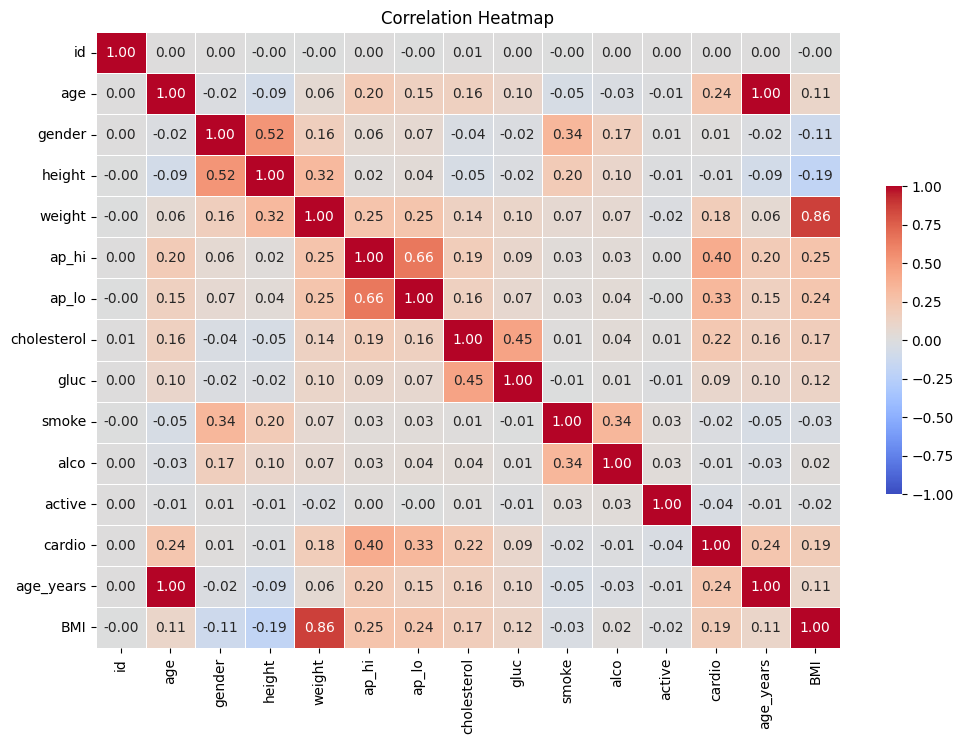

In [23]:

# Calculate the correlation matrix
corr_matrix = new_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, center=0, linewidths=.5, cbar_kws={"shrink": .5})

# Title for the heatmap
plt.title("Correlation Heatmap")

# Show the heatmap
plt.show()


Features that affect each other are represented between -1 and 1. 0 Being neutral. The stronger they effect each other the higher the number. (redness)

We can look at many different angles but lets look correlation with heart disease (cardio) since that interest us the most.

&nbsp;
- Blood pressure: (api hi/lo)

Systolic and diastolic blood pressure are closely related and both are strong indicators of cardiovascular disease.

&nbsp;

- Age: 

As age increases, the risk of cardiovascular disease and the values of blood pressure and cholesterol tend to increase.<br>

&nbsp;

- Cholesterol:

Higher cholesterol levels are associated with higher blood pressure, glucose levels, and cardiovascular disease risk.

&nbsp;

- BMI: 0.19

This suggests that higher BMI values are associated with higher weight, blood pressure, and cardiovascular disease risk.

&nbsp;

The remaining variables  smoke, alco, and active, show weak or very weak correlations with most of the other variables in the dataset.
Gender has some correlation with height and weight as expected.



---------------------------
## Data Prep for ML training.

In [24]:
new_df.head(1)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_category,bp_category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,21.96712,Normal range,Stage 1 hypertension


In [25]:
# I will drop the id column.
new_df.drop(['id'], axis = 1, inplace = True) 


In [26]:

new_df.head(1)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_category,bp_category
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,21.96712,Normal range,Stage 1 hypertension


Create 2 new datasets:
 - Data set 1: Drop features height, weight, ap_hi, ap_lo, BMI. One-Hot encoding on BMI_category, bp_category and gender.
 - Data set 2: Drop features BMI_category, bp_category, height, weight. One-Hot encoding on gender.

In [27]:
# Dataset 1:

# Drop unnecessary columns
df1 = new_df.drop(columns=['height', 'weight', 'ap_hi', 'ap_lo', 'BMI'])

# One-Hot encoding for BMI_category, bp_category, and gender
df1['gender'] = df1['gender'].map({1: 'F', 2: 'M'})
df1 = pd.get_dummies(df1, columns=['gender', 'BMI_category', 'bp_category'])

df1.head(1)

,age,cholesterol,gluc,smoke,alco,active,cardio,age_years,gender_F,gender_M,BMI_category_Normal range,BMI_category_Overweight (Pre-obese),BMI_category_Obese (Class I),BMI_category_Obese (Class II),BMI_category_Obese (Class III),bp_category_Elevated,bp_category_Healthy,bp_category_Hypertension crisis,bp_category_Stage 1 hypertension,bp_category_Stage 2 hypertension
0,18393,1,1,0,0,1,0,50.391781,0,1,1,0,0,0,0,0,0,0,1,0


In [28]:
# Dataset 2:

# Drop unnecessary columns
df2 = new_df.drop(columns=['height', 'weight', 'BMI_category', 'bp_category'])

# One-Hot encoding for gender
df2['gender'] = df2['gender'].map({1: 'F', 2: 'M'})
df2 = pd.get_dummies(df2, columns=['gender'])

df2.head()


,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,gender_F,gender_M
0,18393,110,80,1,1,0,0,1,0,50.391781,21.967120,0,1
1,20228,140,90,3,1,0,0,1,1,55.419178,34.927679,1,0
2,18857,130,70,3,1,0,0,0,1,51.663014,23.507805,1,0
3,17623,150,100,1,1,0,0,1,1,48.282192,28.710479,0,1
4,17474,100,60,1,1,0,0,0,0,47.873973,23.011177,1,0


----------------------------------------------
## Selecting ML models to test

For classification tasks like this, where the goal is to predict the presence or absence of cardiovascular disease (indicated by the 'cardio' variable), I will try the following models:

-   Logistic Regression: This is a simple linear model for binary classification problems. It is easy to implement and can serve as a good baseline.

-   Decision Trees: These are simple, tree-like structures that recursively split the dataset based on feature values. They are interpretable and can handle both numerical and categorical data.

-   Random Forest: An ensemble method that constructs multiple decision trees and combines their predictions. It generally performs better than a single decision tree, as it reduces overfitting by averaging over multiple trees.

-   Gradient Boosting Machines (e.g., XGBoost, LightGBM): These are ensemble methods that build a series of weak models (usually decision trees) iteratively, improving the model by focusing on the misclassified samples from the previous iteration. They can achieve high performance in a wide range of classification problems.

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [30]:


# Assuming df1 or df2 is your dataset
X = df1.drop(columns=['cardio'])  # Replace with df2 if using the second dataset
y = df1['cardio']

# Standardization
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X)

# Normalization
scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(X)

In [31]:


# df1 dataset
X = df1.drop(columns=['cardio'])  # Replace with df2 if using the second dataset
y = df1['cardio']

# Standardization
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X)

# Normalization
scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(X)

# Split the datasets into training and testing sets
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_standardized, y, test_size=0.3, random_state=42)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': np.logspace(-3, 3, 7),
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': list(range(3, 21))
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': [None, 10, 20, 30, 40, 50],
            'min_samples_split': [2, 5, 10]
        }
    },

    # Removed SVM model - Took longer than I liked. Might try again with faster computing. Leaving the code here
    # 'SVM': {
    #     'model': SVC(),
    #     'params': {
    #         'C': [1, 10], # Reduced from [0.1, 1, 10, 100]
    #         'gamma': ['scale'], # Reduced from [0.1, 1, 10, 100]
    #         'kernel': ['linear', 'rbf']
    #     }
    # },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    }
}

# Perform hyperparameter tuning using GridSearchCV
datasets = {'Standardized': (X_train_std, y_train_std), 'Normalized': (X_train_norm, y_train_norm)}
results = []

for dataset_name, (X_train, y_train) in datasets.items():
    print(f"Hyperparameter tuning for {dataset_name} dataset")
    for name, model_params in param_grids.items():
        print(f"Tuning {name}")
        grid = GridSearchCV(model_params['model'], model_params['params'], cv=5, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_params = grid.best_params_
        best_score = grid.best_score_

        results.append({
            'Dataset': dataset_name,
            'Model': name,
            'Best Parameters': str(best_params),
            'Best Accuracy Score': best_score
        })

        print(f"Best parameters for {name}: {best_params}")
        print(f"Best accuracy score: {best_score:.4f}\n")

# Save the results to a single spreadsheet
results_df = pd.DataFrame(results)
results_df.to_excel('hyperparameter_tuning_results_dataset1.xlsx', index=False)


Hyperparameter tuning for Standardized dataset
Tuning Logistic Regression
Best parameters for Logistic Regression: {'C': 1.0, 'solver': 'liblinear'}
Best accuracy score: 0.7030

Tuning Decision Tree
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 8}
Best accuracy score: 0.6991

Tuning Random Forest
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best accuracy score: 0.7031

Tuning Gradient Boosting
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best accuracy score: 0.7047

Hyperparameter tuning for Normalized dataset
Tuning Logistic Regression
Best parameters for Logistic Regression: {'C': 100.0, 'solver': 'newton-cg'}
Best accuracy score: 0.7030

Tuning Decision Tree
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 8}
Best accuracy score: 0.6989

Tuning Random Forest
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_spl

In [32]:

# df2 dataset
X = df2.drop(columns=['cardio'])  # Replace with df2 if using the second dataset
y = df2['cardio']

# Standardization
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X)

# Normalization
scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(X)

# Split the datasets into training and testing sets
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_standardized, y, test_size=0.3, random_state=42)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Define parameter grids for each model, went with some basic starting recommendations to try out.
param_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': np.logspace(-3, 3, 7),
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': list(range(3, 21))
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': [None, 10, 20, 30, 40, 50],
            'min_samples_split': [2, 5, 10]
        }
    },

    # Removed SVM model - Took longer than I liked. Might try again with faster computing. Leaving the code here
    # 'SVM': {
    #     'model': SVC(),
    #     'params': {
    #         'C': [1, 10], # Reduced from [0.1, 1, 10, 100]
    #         'gamma': ['scale'], # Reduced from [0.1, 1, 10, 100]
    #         'kernel': ['linear', 'rbf']
    #     }
    # },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    }
}

# Perform hyperparameter tuning using GridSearchCV
datasets = {'Standardized': (X_train_std, y_train_std), 'Normalized': (X_train_norm, y_train_norm)}
results = []

for dataset_name, (X_train, y_train) in datasets.items():
    print(f"Hyperparameter tuning for {dataset_name} dataset")
    for name, model_params in param_grids.items():
        print(f"Tuning {name}")
        grid = GridSearchCV(model_params['model'], model_params['params'], cv=5, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_params = grid.best_params_
        best_score = grid.best_score_

        results.append({
            'Dataset': dataset_name,
            'Model': name,
            'Best Parameters': str(best_params),
            'Best Accuracy Score': best_score
        })

        print(f"Best parameters for {name}: {best_params}")
        print(f"Best accuracy score: {best_score:.4f}\n")

# Save the results to a single spreadsheet
results_df = pd.DataFrame(results)
results_df.to_excel('hyperparameter_tuning_results_dataset2.xlsx', index=False)

Hyperparameter tuning for Standardized dataset
Tuning Logistic Regression
Best parameters for Logistic Regression: {'C': 100.0, 'solver': 'sag'}
Best accuracy score: 0.7277

Tuning Decision Tree
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5}
Best accuracy score: 0.7297

Tuning Random Forest
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best accuracy score: 0.7354

Tuning Gradient Boosting
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}
Best accuracy score: 0.7346

Hyperparameter tuning for Normalized dataset
Tuning Logistic Regression
Best parameters for Logistic Regression: {'C': 100.0, 'solver': 'newton-cg'}
Best accuracy score: 0.7277

Tuning Decision Tree
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5}
Best accuracy score: 0.7297

Tuning Random Forest
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, '

Lets go with dataset 2.


To recap:
 - Data set 2: Drop features BMI_category, bp_category, height, weight. One-Hot encoding on gender.

In [33]:
# Instantiate the classifiers with their respective best parameters
log_reg = LogisticRegression(C=100.0, solver='newton-cg')
dec_tree = DecisionTreeClassifier(criterion='gini', max_depth=5)
rand_forest = RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200)
grad_boost = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)

# Create a VotingClassifier with the classifiers
voting_clf = VotingClassifier(
    estimators=[
        ('Logistic Regression', log_reg),
        ('Decision Tree', dec_tree),
        ('Random Forest', rand_forest),
        ('Gradient Boosting', grad_boost)
    ],
    voting='soft'
)

# Train and evaluate the VotingClassifier on the dataset
X = df2.drop(columns=['cardio'])
y = df2['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"VotingClassifier accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

c:\Users\Edo\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Edo\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Edo\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Edo\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Edo\AppData\Local\Programs\Python\Pytho

VotingClassifier accuracy: 0.7328
              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10335
           1       0.76      0.67      0.72     10280

    accuracy                           0.73     20615
   macro avg       0.74      0.73      0.73     20615
weighted avg       0.74      0.73      0.73     20615



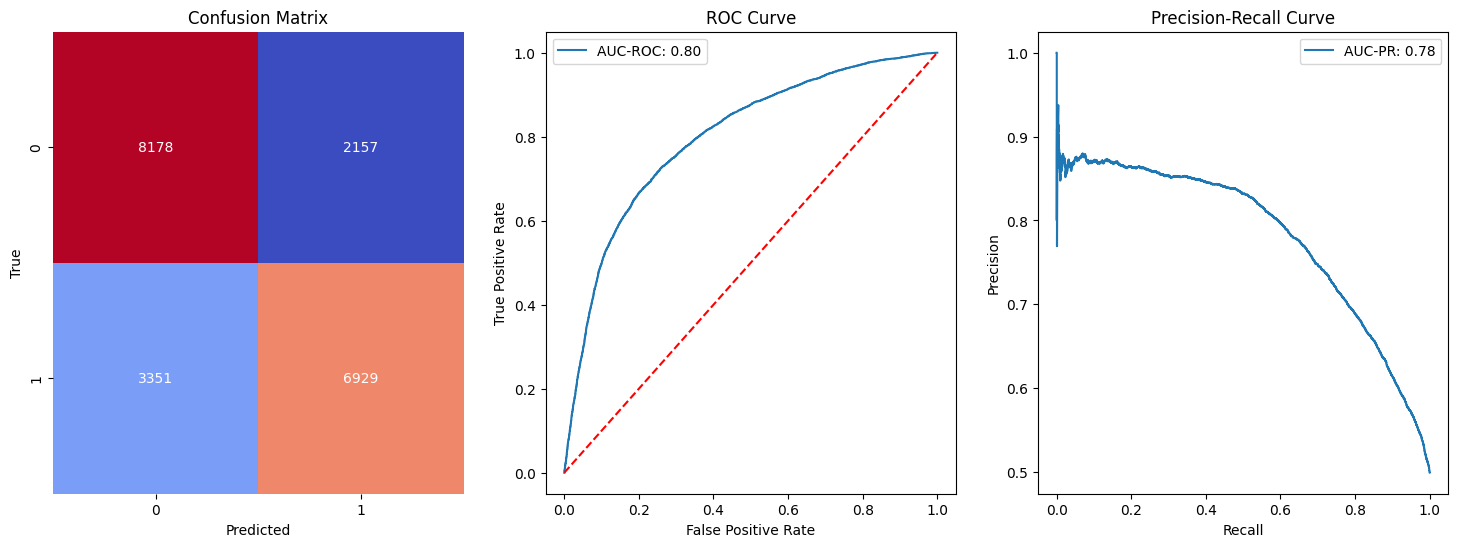

In [34]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc

y_pred = voting_clf.predict(X_test)
y_pred_proba = voting_clf.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix')

# Plot ROC Curve
axes[1].plot(fpr, tpr, label=f'AUC-ROC: {roc_auc:.2f}')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='red')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()

# Plot Precision-Recall Curve
axes[2].plot(recall, precision, label=f'AUC-PR: {pr_auc:.2f}')
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].set_title('Precision-Recall Curve')
axes[2].legend()

plt.show()


### Summary Evaluation

Confusion Matrix:
- True Negative (TN): 8040 - The number of times the model correctly predicted class 0 (non-cardiovascular disease) when the true class was also 0.
- False Positive (FP): 2096 - The number of times the model incorrectly predicted class 1 (cardiovascular disease) when the true class was 0.
- False Negative (FN): 3205 - The number of times the model incorrectly predicted class 0 when the true class was 1.
- True Positive (TP): 6617 - The number of times the model correctly predicted class 1 when the true class was also 1.

- AUC-ROC Curve:

Simply put, the trade-off between correctly identifying positive cases (True Positive Rate, TPR) and incorrectly identifying negative cases as positive (False Positive Rate, FPR).

In general, a higher AUC value indicates a better model. The curve should be as close to the top-left corner of the plot as possible. This means that the model has a high true positive rate (correctly identifying positive cases) while maintaining a low false positive rate (not incorrectly identifying negative cases as positive).

- Precision-Recall Curve

The Precision-Recall curve is another graphical representation of a classifier's performance, particularly useful when dealing with imbalanced datasets. It shows the trade-off between Precision (the proportion of true positive predictions among all positive predictions) and Recall (the proportion of true positive predictions among all actual positive instances).

The curve would be close to the top-right corner of the plot. A curve that closely follows the top and right edges of the plot indicates better model performance.


----------------------

## Deploying model - Testing on new samples

In [35]:


# Select 100 random rows from df2
test_samples = df2.sample(n=100, random_state=42)

# Save the test_samples to a CSV file
test_samples.to_csv('test_samples.csv', index=False)

# Drop the selected rows from df2 and create a new DataFrame called new_data
new_data = df2.drop(test_samples.index)


Training the model

In [36]:

# Split the new_data into features (X) and target (y)
X_new = new_data.drop(columns=['cardio'])
y_new = new_data['cardio']

# Split the data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

# Train the VotingClassifier on the new_data
voting_clf.fit(X_train_new, y_train_new)

# Predict the target values using the trained VotingClassifier
y_pred_new = voting_clf.predict(X_test_new)

# Calculate the accuracy of the model
accuracy_new = accuracy_score(y_test_new, y_pred_new)




c:\Users\Edo\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Edo\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Edo\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Edo\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Edo\AppData\Local\Programs\Python\Pytho

VotingClassifier accuracy on new_data: 0.7325


In [40]:
# Print the accuracy
print(f"Final model accuracy on new_data: {accuracy_new:.4f}")

Final model accuracy on new_data: 0.7325


Saving the model

In [37]:
import joblib

# Save the trained model as a .pkl file
joblib.dump(voting_clf, 'voting_clf_model.pkl')

['voting_clf_model.pkl']

Reading the results after running our production_model.py on the 100 random samples!

In [38]:

# Read the CSV file into a DataFrame
prediction_results = pd.read_csv("prediction_results.csv")

# Display the DataFrame
print(prediction_results.head(25))

    probability class 0  probability class 1  prediction
0              0.891377             0.108623           0
1              0.827270             0.172730           0
2              0.238251             0.761749           1
3              0.119075             0.880925           1
4              0.437910             0.562090           1
5              0.164622             0.835378           1
6              0.660499             0.339501           0
7              0.632674             0.367326           0
8              0.817821             0.182179           0
9              0.706054             0.293946           0
10             0.693477             0.306523           0
11             0.766280             0.233720           0
12             0.589710             0.410290           0
13             0.655259             0.344741           0
14             0.826822             0.173178           0
15             0.578374             0.421626           0
16             0.585198        

### Summary and conclusion

-   Voting Classifier model achieved around 70% accuracy.

-   The model combines multiple classifiers  providing a more robust prediction. The features used are a mix of demographic, lifestyle, and physiological factors relevant to cardiovascular disease risk.


Although the model performs moderately well, there's room for improvement. Enhancements could be achieved by refining the dataset, exploring additional features or techniques, and experimenting with more advanced models.

------------------------
Some other thoughts:

Majority of this model was developed in collaboration with chatgpt as an personal experiment. There was a lot of back and forth. I learned alot what worked and didn't work and how to communicate with it. I learned how it can hallucinate, lose track and how to get it back. It was really great learning experience and it makes me excited about the future.

I believe as we move forward there I expect to see a move toward creating local language models for businesses so that the data is protected and fully used. This collaboration makes me think it might be worth to try as a future project to create a specialized language model based on chatgpt that can run on a local machine and keep the data safe and evolve further as it is being used.


Thanks for reading!